## DATATHON HENRY
El proyecto consiste en implementar un modelo de machine learning, con el objeto de realizar una prediccion sobre la cantidad de bicicletas que se alquilan, utilizando la informacion provista

inicio importando las librerias a utilizar

In [239]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime as dt
import math

leo los datasets en formacio .XLSX, los guardo en los respectivos dataframes

In [272]:
df_train = pd.read_excel(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\dataton\datasets\bike_train.xlsx")
df_test = pd.read_excel(r"C:\Users\franc\OneDrive\Documentos\Henry\proyectos\dataton\datasets\bike_test.xlsx")

tomamos un primer vistazo al dataset de train y de test provistos

In [273]:
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [274]:
df_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


vemos si las features (columnas) tienen valores vacios o no, al ver el metodo .info() de cada una vemos que ambos datasets estan limpios

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   float64       
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   float64       
 3   yr          5380 non-null   float64       
 4   mnth        5380 non-null   float64       
 5   hr          5380 non-null   float64       
 6   holiday     5380 non-null   float64       
 7   weekday     5380 non-null   float64       
 8   workingday  5380 non-null   float64       
 9   weathersit  5380 non-null   float64       
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
 14  casual      5380 non-null   float64       
 15  registered  5380 non-null   float64       
dtypes: datetime64[ns](1), fl

vemos los valores maximos y minimos de cada feature en ambos datasets

In [9]:
df_test.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968,48.224721,210.083457
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988,58.190764,186.387877
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000,0.000000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500,6.000000,51.000000
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200,28.000000,175.000000
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700,69.000000,304.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700,362.000000,886.000000


In [10]:
df_test.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
count,5380.000000,5380.000000,5380.0,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,14689.500000,3.150558,1.0,8.784758,11.524721,0.031041,2.991078,0.67974,1.403532,0.566758,0.535741,0.630483,0.175968,48.224721,210.083457
std,1553.216555,0.839184,0.0,2.145166,6.920601,0.173444,2.007032,0.46662,0.612343,0.182800,0.161300,0.174493,0.113988,58.190764,186.387877
min,12000.000000,1.000000,1.0,5.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.140000,0.151500,0.160000,0.000000,0.000000,0.000000
25%,13344.750000,3.000000,1.0,7.000000,6.000000,0.000000,1.000000,0.00000,1.000000,0.400000,0.409100,0.490000,0.104500,6.000000,51.000000
50%,14689.500000,3.000000,1.0,9.000000,12.000000,0.000000,3.000000,1.00000,1.000000,0.600000,0.575800,0.640000,0.164200,28.000000,175.000000
75%,16034.250000,4.000000,1.0,11.000000,18.000000,0.000000,5.000000,1.00000,2.000000,0.700000,0.666700,0.780000,0.253700,69.000000,304.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.00000,3.000000,1.000000,0.924200,1.000000,0.656700,362.000000,886.000000


## diccionario de las columnas:

instant: identificador del registro.

dteday: fecha del registro.

season: temporada (1: primavera, 2: verano, 3: otoño, 4: invierno).

yr: año del registro (0: 2011, 1:2012).

mnth: mes del registro (1 a 12).

hr: hora del registro (0 a 23).

holiday: si el día meteorológico es feriado toma el valor 1, sino toma el valor 0 (extraído desde http://dchr.dc.gov/page/holiday-schedule).
weekday: día de la semana.

workingday: si el día es laboral toma el valor 1, sino 0. Un día laboral es un día no feriado ni fin de semana.

weathersit: indica el tipo de clima que hubo el momento del registro, las opciones son:

        1: Despejado, algunas nubes o parcialmente nublado.

        2: Neblina con nubes, neblina con nubes fragmentadas, neblina con algunas nubes o sólo neblina.

        3: Nieve ligera, llovizna con tormenta eléctrica y nubes dispersas o llovizna con nubes dispersas.

        4: Lluvia fuerte con granizos, tormenta eléctrica y neblina, o nieve con niebla.

temp: temperatura normalizada en grados Celsius. La escala llega hasta un máximo de temperatura de 41ºC.

atemp: sensación térmica normalizada en grados Celsius. La escala llega hasta un máximo de 50ºC.

hum: nivel de humedad normalizada. La escala llega hasta un máximo de 100.

windspeed: velocidad del viento normalizada. La escala llega hasta un máximo de 67 km/h.

casual: cantidad de usuarios casuales en el registro, siendo aquellos que no están registrados.

registered: cantidad de usuarios registrados en el registro.

cnt: Cantidad total de bicicletas rentadas en el registro, incluyendo ambos tipos de usuarios (casuales y registrados).

de aca en mas solamente trabajo con el dataset de entrenamiento

In [275]:
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


vemos un pariplot y un heatmap de todas las columnas, para determinar cuales son las features de interes, el resto se dejan de lado

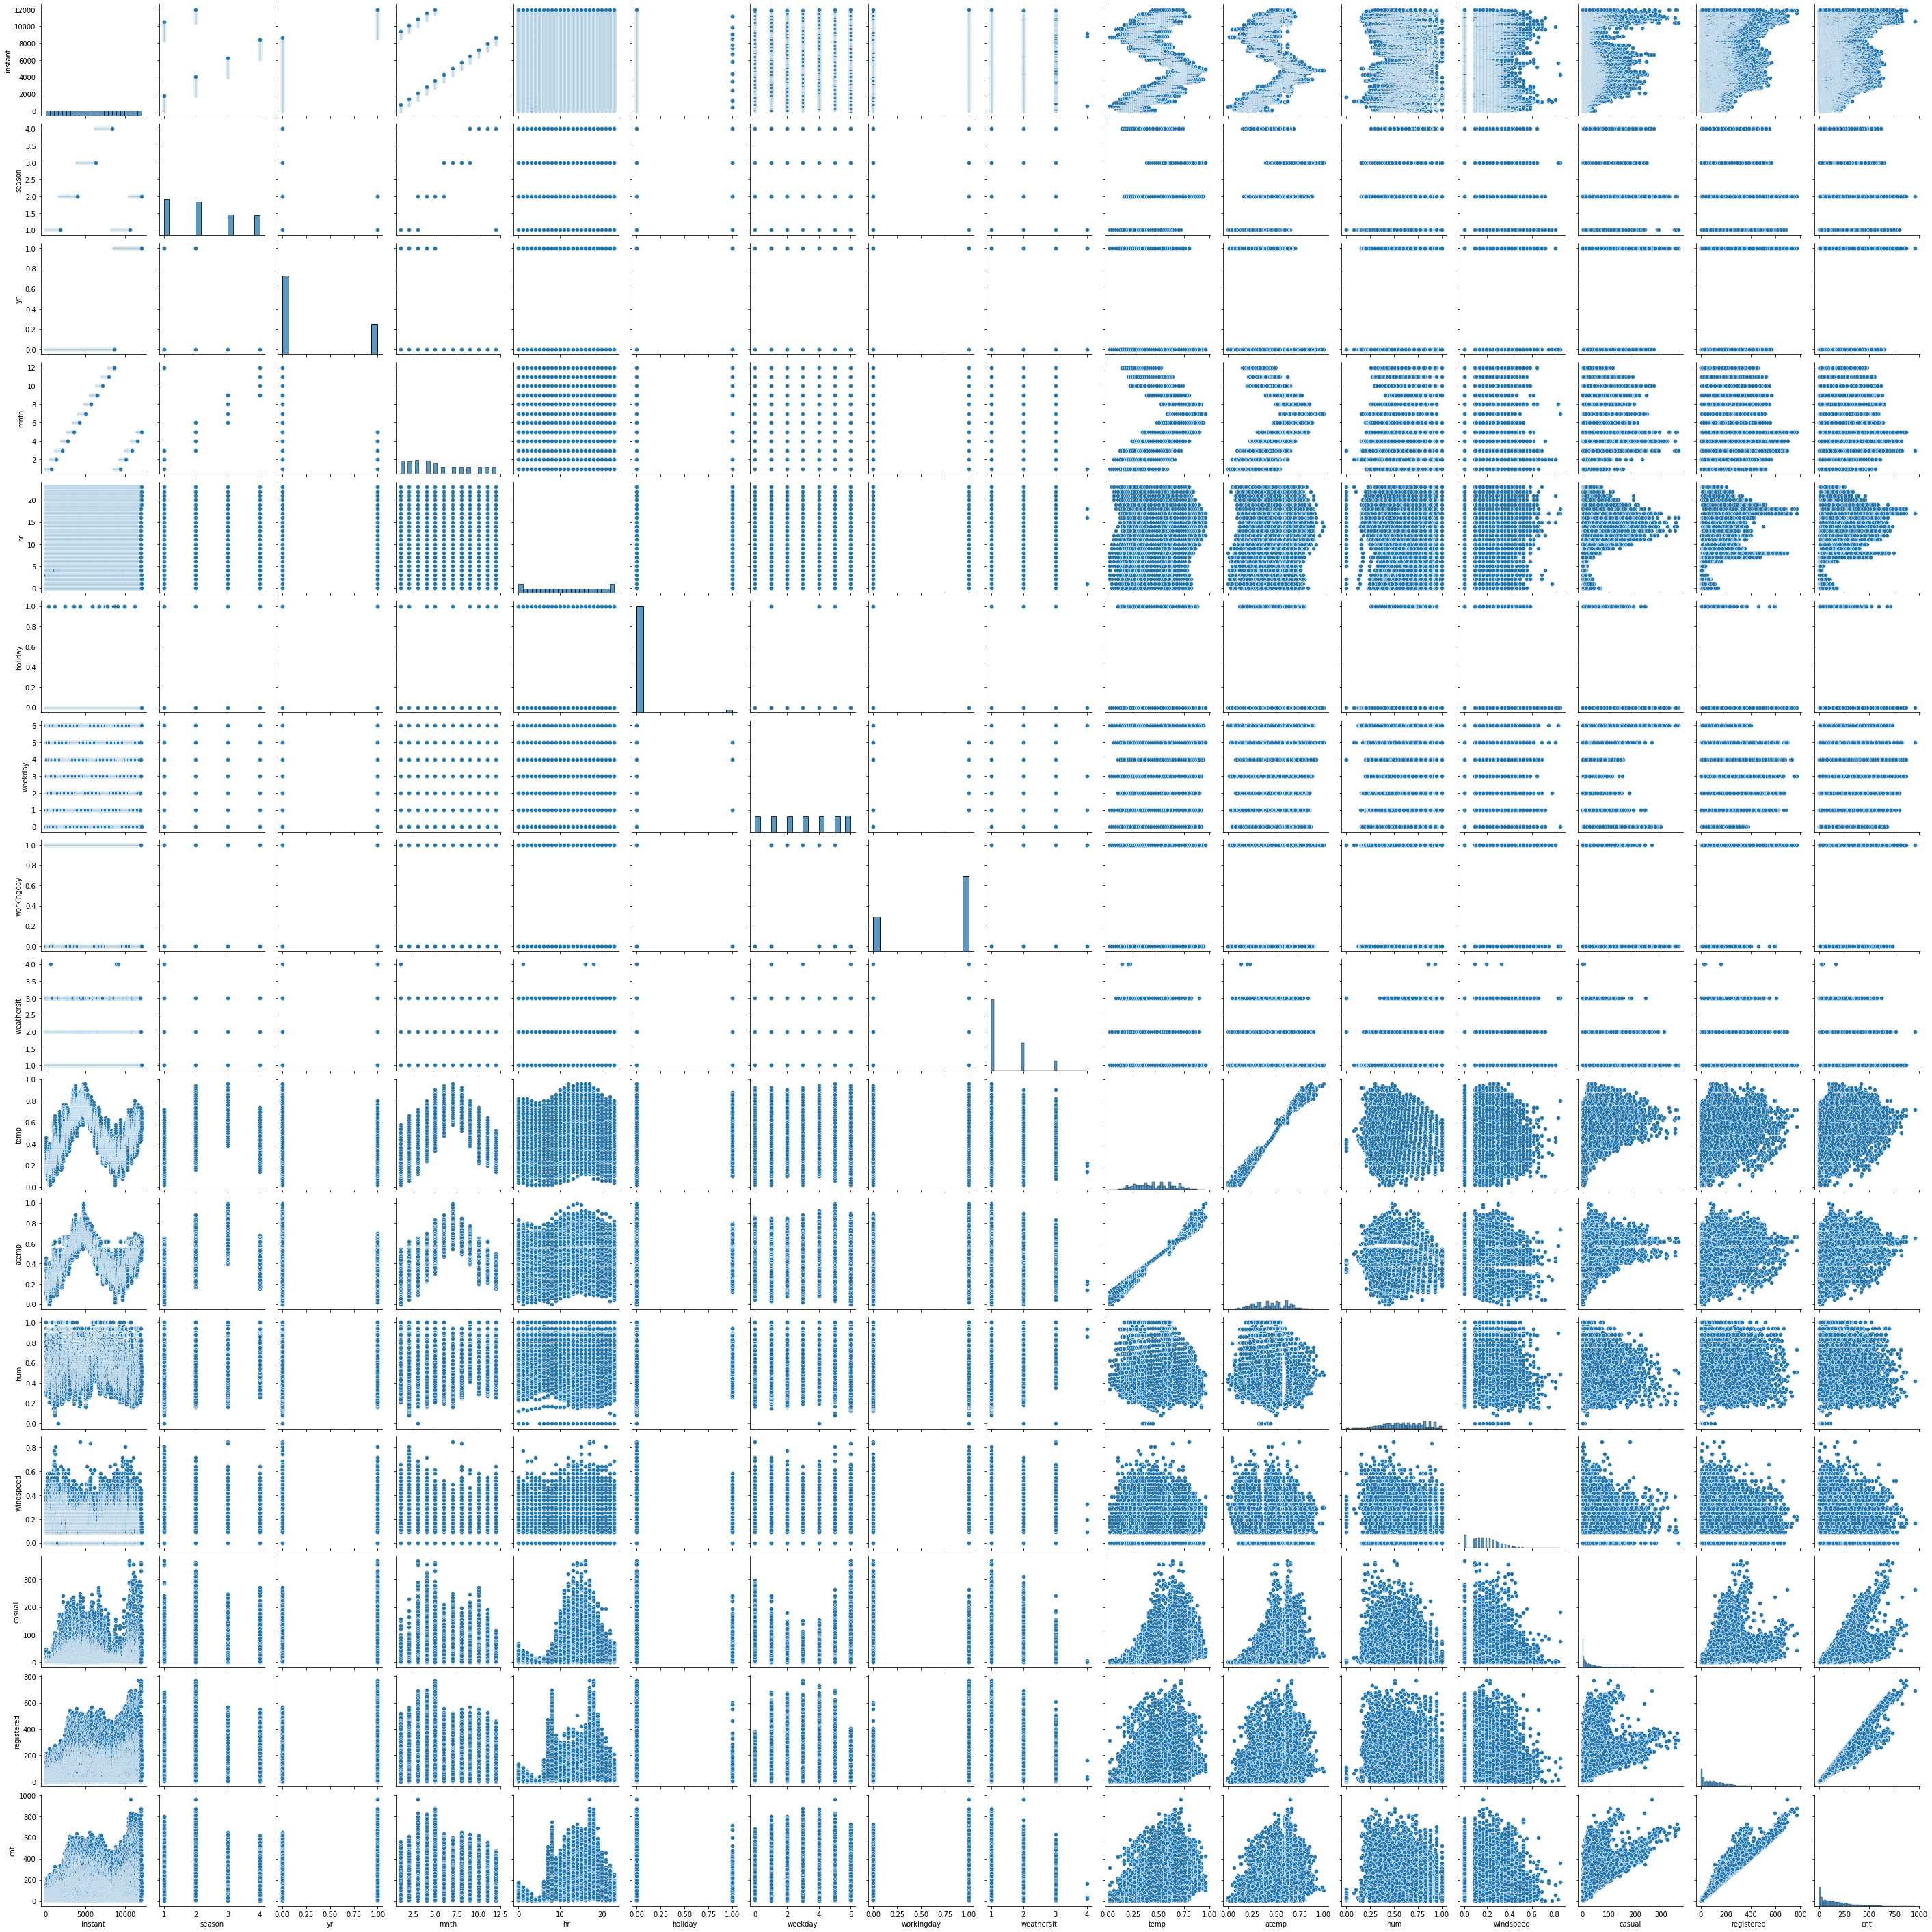

In [13]:
sns.pairplot(df_train)

convierto la columna dteday de date time a ordinal, para poder usarla para entrenar

In [276]:
df_train["dteday"] = df_train["dteday"].map(dt.datetime.toordinal)

genero un heatmap para ver la correlacion de forma numerica

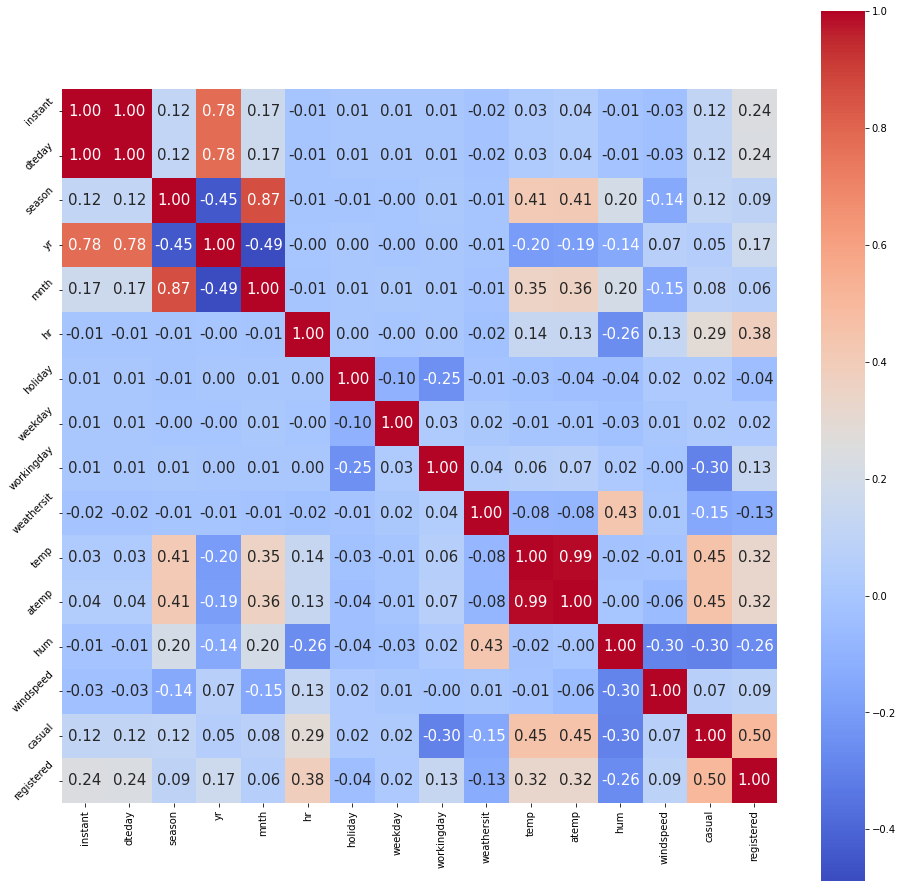

In [277]:
corr = df_train.drop(columns = ['cnt']).corr()  #no tomo en cuenta la columna cnt porque es justamente lo que busco predecir
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_train.drop(columns = ['cnt']).columns, 
           yticklabels= df_train.drop(columns = ['cnt']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

In [278]:
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## columnas que no tomo en cuenta con su motivo:

    instant: no suma nada al analisis

    dteday: a mi parecer, la fecha exacta no suma tanta informacion, el alquiler de bicicletas se segmenta mas que nada por temporada, hora, si es feriado o no, dia de la semana o no y si es dia de trabajo o no

    mnth: dado que tengo una columna que me informa la estacion del año, a mi parecer la informacion sobre el numero de mes resulta redundante

    yr: el año no suma mucha informacion, dado que todos los años deberia repetirse lo mismo, porque es un proceso ciclico, que se repite por temporadas

    temp: dado que tengo la feature atemp que es la sensacion termica y es la temperatura que sentimos, la decision entre alquilar una bicicleta esta mas dada por la temperatura que uno siente que por el valor que dice el pronostico meteorologico

    casual: es parte del total tomado en la feature cnt que se busca predecir

    registered: es parte del total tomado en la feature cnt que se busca predecir

tomo solo las columnas de interes

In [39]:
# df_train = df_train[["season", "hr", "holiday", "weekday", "workingday", "weathersit", "atemp", "hum", "windspeed", "cnt"]]

vemos nuevamente el heatmap, pero esta vez solo con las features que considero de interes

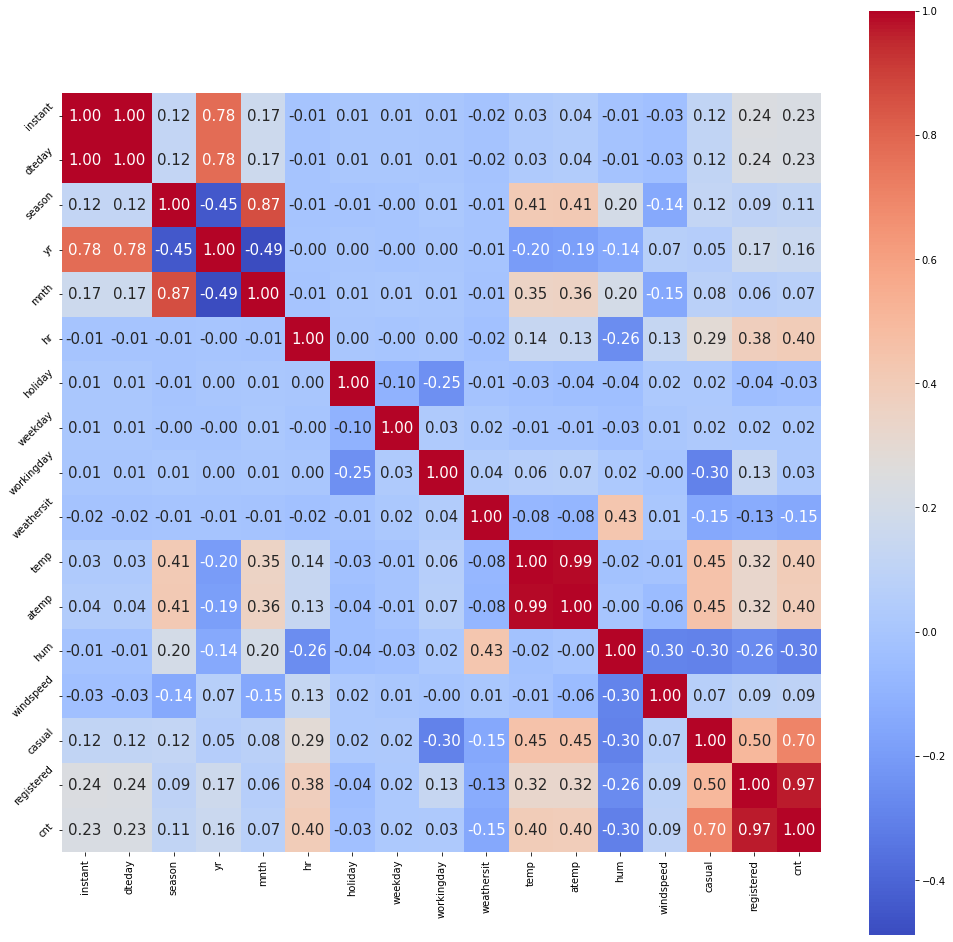

In [279]:
corr = df_train.corr()  #no tomo en cuenta la columna cnt porque es justamente lo que busco predecir
plt.figure(figsize=(17,17))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_train.columns, 
           yticklabels= df_train.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 45)
plt.show()

muestro una grafica de la cantidad de bicicletas alquiladas en funcion de la sensacion termica y la humedad

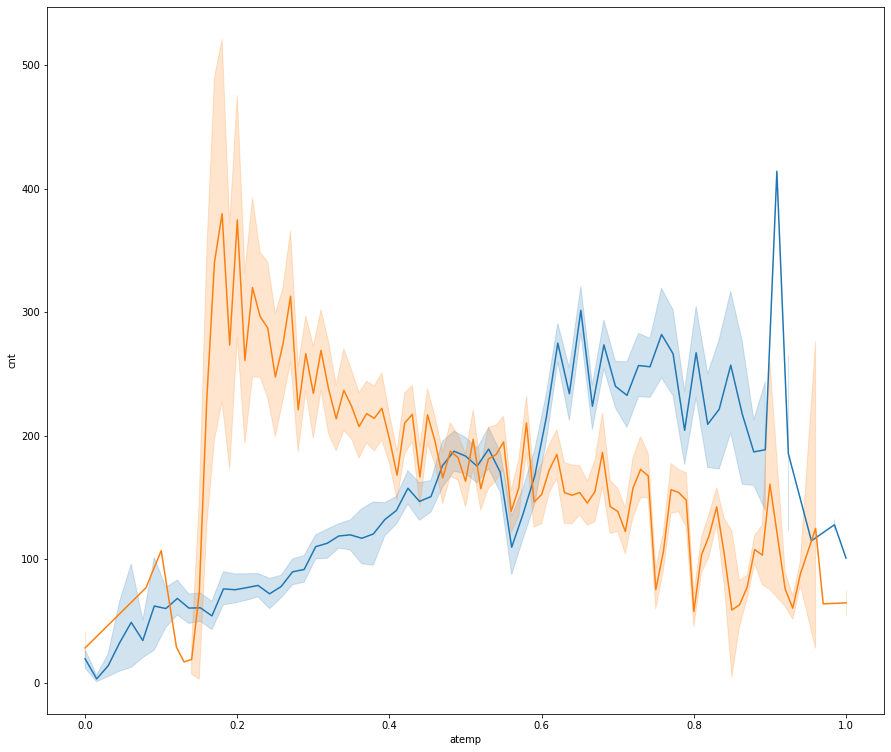

In [257]:
plt.figure(figsize = (15, 13))
sns.lineplot(x = df_train.atemp, y = df_train.cnt)
sns.lineplot(x = df_train.hum, y = df_train.cnt)

plt.show()

muestro una grafica sobre la evolucion de la cantidad de bicicletas alquiladas en funcion de la hora

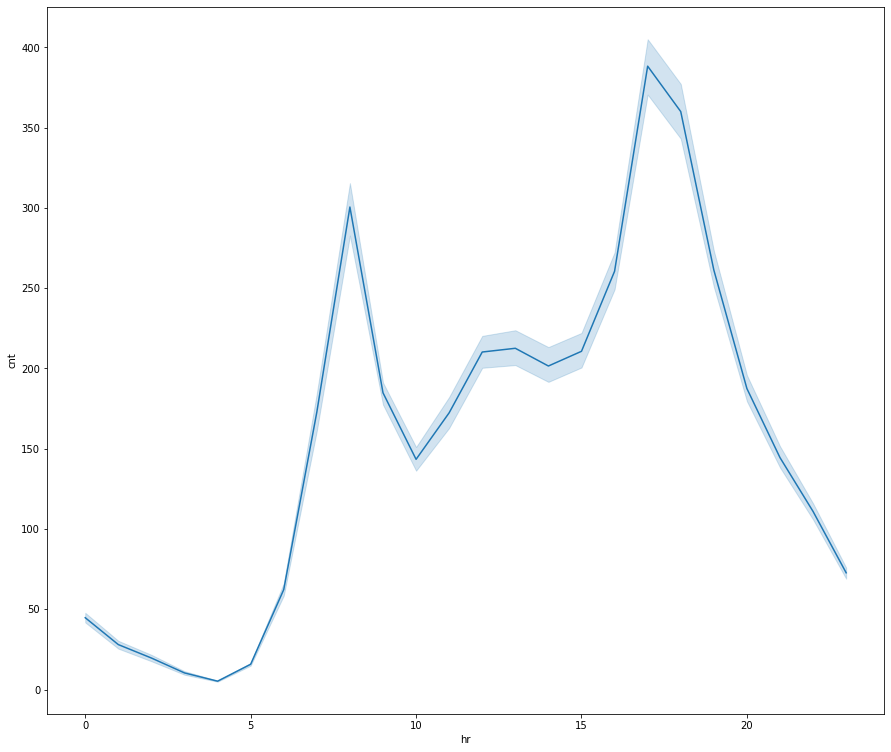

In [258]:
plt.figure(figsize = (15, 13))
sns.lineplot(x = df_train.hr, y = df_train.cnt)
plt.show()

instancio los modelos que me parece que pueden ser utilies para este analisis: decission tree classifier y k nearest neighbors

In [280]:
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()

para el entrenamiento, separo en features para prediccion y feature a predecir, tambien preparo los datos para el resto de la prediccion

para X dropeo cnt porque es lo que quiero predecir
tambien dropeo registered y casual porque spoilean la prediccion de cnt, temp la elimino dado que esta muy correlacionada con atemp

dropeo yr, mnth, instant porque estan muy correlacionadas con otras, no aportan mucha imformacion util al modelo

In [317]:
df_train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [305]:
X = df_train.drop(columns = ["cnt", "registered", "casual", "temp", "yr", "mnth", "instant"]).values
y = df_train.cnt.values

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

elijo usar gridsearch para entrenar los modelos, planteo los parametros para entrenamiento de cada modelo

In [307]:
tree_para = {'max_depth':[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30]}
knn_para = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35, 40, 50]} #, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15

instancio ambos gridsearch

In [308]:
gs_tree = GridSearchCV(tree, tree_para, cv = 5)
gs_knn = GridSearchCV(knn, knn_para, cv = 5)

entreno los gridsearch

In [309]:
gs_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 20, 25, 30]})

In [310]:
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 20, 25, 30, 35, 40, 50]})

vemos los mejores parametros

In [311]:
gs_tree.best_params_

{'max_depth': 12}

In [312]:
gs_knn.best_params_

{'n_neighbors': 3}

hago una prediccion para cada modelo

In [313]:
y_pred_tree = gs_tree.predict(X_test)
y_pred_knn = gs_knn.predict(X_test)

obtengo e imprimo el RMSE

In [314]:
MSE_tree = mean_squared_error(y_test, y_pred_tree)
MSE_knn = mean_squared_error(y_test, y_pred_knn)

In [315]:
RMSE_tree = math.sqrt(MSE_tree)
RMSE_knn = math.sqrt(MSE_knn)

vemos que entrenando con todas las columnas

In [304]:
# con todas las columnas
print("RMSE TREE = ", RMSE_tree)
print("RMSE KNN = ", RMSE_knn)

RMSE TREE =  47.42429770168494
RMSE KNN =  72.8313119475408


In [318]:
# sin temp y todas esas
print("RMSE TREE = ", RMSE_tree)
print("RMSE KNN = ", RMSE_knn)

RMSE TREE =  51.60414787217577
RMSE KNN =  55.88531535405542


genero la tabla de prediccion de las cosas que tengo en df_test

In [319]:
df_test.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,12000,2012-05-20,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896
1,12001,2012-05-20,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045
2,12002,2012-05-20,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343
3,12003,2012-05-20,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940
4,12004,2012-05-20,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642


In [320]:
# elimino las columnas con las que no entrene el modelo
df_test.drop(columns = ["temp", "yr", "mnth", "instant"], inplace = True)

convierto a valores ordinales

In [322]:
df_test["dteday"] = df_test["dteday"].map(dt.datetime.toordinal)

In [323]:
df_test.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed
0,734643,2,4,0,0,0,1,0.5000,0.68,0.0896
1,734643,2,5,0,0,0,1,0.4848,0.72,0.1045
2,734643,2,6,0,0,0,1,0.4848,0.63,0.1343
3,734643,2,7,0,0,0,1,0.5000,0.68,0.1940
4,734643,2,8,0,0,0,1,0.5303,0.56,0.1642


elijo predecir con el arbol de decision que tuvo el mejor puntaje

In [324]:
y_test_pred = gs_tree.predict(df_test[["dteday", "season", "hr", "holiday", "weekday", "workingday", "weathersit", "atemp", "hum", "windspeed"]])

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [325]:
y_test_pred

array([ 13.        ,  13.        ,  50.        , ..., 159.22222222,
        98.75      ,  50.92857143])

genero el dataframe de prediccion

In [326]:
df_pred = pd.DataFrame(data = {"pred": y_test_pred})
df_pred

,pred
0,13.000000
1,13.000000
2,50.000000
3,60.000000
4,156.000000
...,...
5375,226.000000
5376,169.000000
5377,159.222222
5378,98.750000


genero el archivo .csv

In [327]:
df_pred.to_csv("fperezalb.csv")

## VERIFICAR CON QUE FEATURES ESTOY ENTRENANDO

In [234]:
# este puntaje es con las columnas registered y casual incluidas, es muy bueno pero no sirve
print("RMSE TREE = ", RMSE_tree)
print("RMSE KNN = ", RMSE_knn)

RMSE TREE =  6.324950592692405
RMSE KNN =  14.186727218307492


vemos que el mejor RMSE (Root Mean Squared Error) lo obtengo con KNN